In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\DATASETS\Retail_Transaction_Dataset.csv")

In [3]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [4]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])

In [5]:
df.shape

(100000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


In [7]:
df.isnull().sum()

CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

In [8]:
df1=df.sort_values(['TotalAmount'],ascending=False)
df1.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
52097,649087,C,9,99.815185,2023-07-27 13:40:00,Debit Card,"693 Williams Pine\nRobertside, WI 23415",Home Decor,0.244387,896.141242
97808,266635,D,9,99.618873,2024-04-11 22:47:00,Credit Card,"8978 Angela Forge\nGrossfort, LA 99907",Books,0.136732,895.343955
97083,590301,A,9,99.908285,2023-10-09 10:09:00,Debit Card,"0303 Keith Manor\nJuliaport, NY 08811",Books,0.630034,893.509454
30448,590260,A,9,99.552733,2023-11-09 01:51:00,Debit Card,"797 Sanders Landing Apt. 719\nNorth Terry, NY ...",Books,0.383498,892.538546
41342,55183,B,9,99.644161,2023-07-17 01:04:00,Cash,"8889 Carr Mission\nRonaldview, TN 69021",Home Decor,0.506715,892.253248


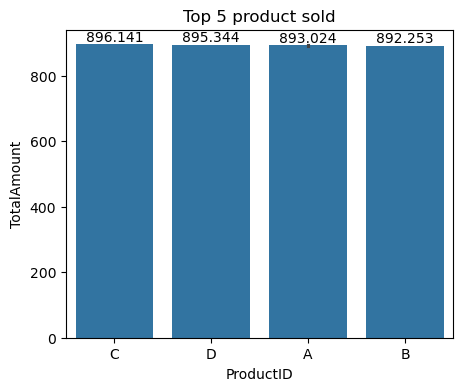

In [9]:
plt.figure(figsize=(5,4))
df1['TotalAmount'].sort_values(ascending=False)
ax=sns.barplot(data=df1.head(),x='ProductID',y='TotalAmount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 5 product sold')
plt.show()

In [10]:
df.groupby('ProductID')[['PaymentMethod','ProductCategory']].value_counts()

ProductID  PaymentMethod  ProductCategory
A          Credit Card    Clothing           1577
                          Home Decor         1577
           PayPal         Books              1573
                          Clothing           1572
           Cash           Electronics        1567
                                             ... 
D          Cash           Home Decor         1558
                          Clothing           1552
           Credit Card    Electronics        1552
           Debit Card     Books              1501
           Credit Card    Home Decor         1489
Name: count, Length: 64, dtype: int64

In [11]:
df.groupby('ProductID')['PaymentMethod'].value_counts()

ProductID  PaymentMethod
A          Credit Card      6277
           PayPal           6218
           Cash             6169
           Debit Card       6088
B          Credit Card      6296
           PayPal           6255
           Cash             6230
           Debit Card       6216
C          Debit Card       6397
           Cash             6330
           PayPal           6303
           Credit Card      6179
D          PayPal           6291
           Credit Card      6282
           Cash             6279
           Debit Card       6190
Name: count, dtype: int64

In [12]:
df['PaymentMethod'].value_counts()

PaymentMethod
PayPal         25067
Credit Card    25034
Cash           25008
Debit Card     24891
Name: count, dtype: int64

In [13]:
dp=df[df['ProductID']=='A']

In [14]:
df[df['PaymentMethod']=='Cash'].head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484
5,463050,D,3,54.093152,2023-08-15 04:24:00,Cash,"8492 Jonathan Drive\nNorth Robertshire, TN 67532",Electronics,10.888768,144.609223


In [15]:
df[(df['ProductID']=='A') & (df['ProductCategory']=='Books')].head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
32,628270,A,5,61.432803,2023-06-04 00:37:00,Debit Card,"6472 Jones Courts Apt. 861\nWest Dawnport, KS ...",Books,6.323548,287.740350
71,210377,A,7,87.264314,2024-03-02 22:56:00,Debit Card,Unit 4486 Box 3431\nDPO AE 41617,Books,5.367479,578.062939
85,571728,A,9,50.039895,2024-01-11 14:19:00,Credit Card,"4918 Benson Springs Apt. 545\nBakerville, AS 8...",Books,2.865302,437.454907
90,216500,A,1,54.484140,2023-07-02 06:11:00,Credit Card,"616 Edwards Walk Suite 451\nNorth Thomasmouth,...",Books,7.935461,50.160572


In [16]:
df[(df['ProductID']=='D') & (df['PaymentMethod']=='Cash') & (df['ProductCategory']=='Electronics')].head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
5,463050,D,3,54.093152,2023-08-15 04:24:00,Cash,"8492 Jonathan Drive\nNorth Robertshire, TN 67532",Electronics,10.888768,144.609223
101,829031,D,5,94.275309,2023-06-19 03:12:00,Cash,"2155 Hartman Turnpike Apt. 632\nCharlestown, M...",Electronics,3.902614,452.980536
108,965904,D,3,87.612067,2023-05-24 03:49:00,Cash,"86293 Nancy Radial\nSouth Jamesview, FM 65253",Electronics,5.854469,247.448538
144,402432,D,8,21.403014,2023-05-08 21:06:00,Cash,"68018 Griffin Square\nNorth Michaelborough, MP...",Electronics,18.967595,138.747017
182,494205,D,1,67.467608,2023-08-26 16:11:00,Cash,88341 Hammond Vista Suite 966\nEast Michellebo...,Electronics,12.350203,59.135221


In [17]:
df['ProductCategory'].value_counts()

ProductCategory
Clothing       25056
Books          25031
Electronics    24990
Home Decor     24923
Name: count, dtype: int64

In [18]:
df[df['ProductID']=='A']['TotalAmount'].sum()

6138792.468052426

In [19]:
df[df['ProductID']=='B']['TotalAmount'].sum()

6208129.584665001

In [20]:
df[df['ProductID']=='C']['TotalAmount'].sum()

6243648.52566747

In [21]:
df[df['ProductID']=='D']['TotalAmount'].sum()

6242924.9280006215

Text(0.5, 1.0, 'Amount spent on each ProductID')

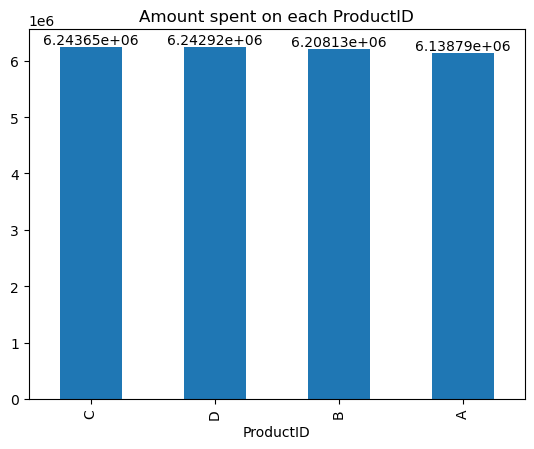

In [22]:
ax=df.groupby('ProductID')['TotalAmount'].sum().sort_values(ascending=False).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Amount spent on each ProductID')    

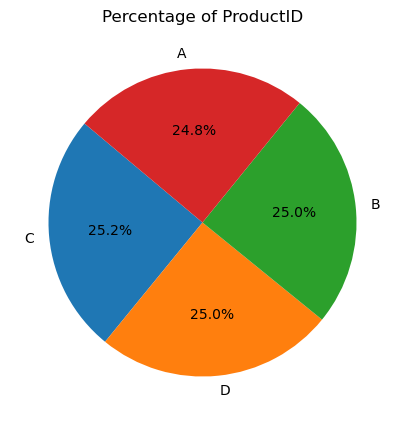

In [23]:
count=df['ProductID'].value_counts()
plt.figure(figsize=(8,5))
plt.pie(count,labels=count.index,autopct='%1.1f%%',startangle=140)
plt.title('Percentage of ProductID')
plt.show()

Text(0.5, 1.0, 'Count of PaymentMethod')

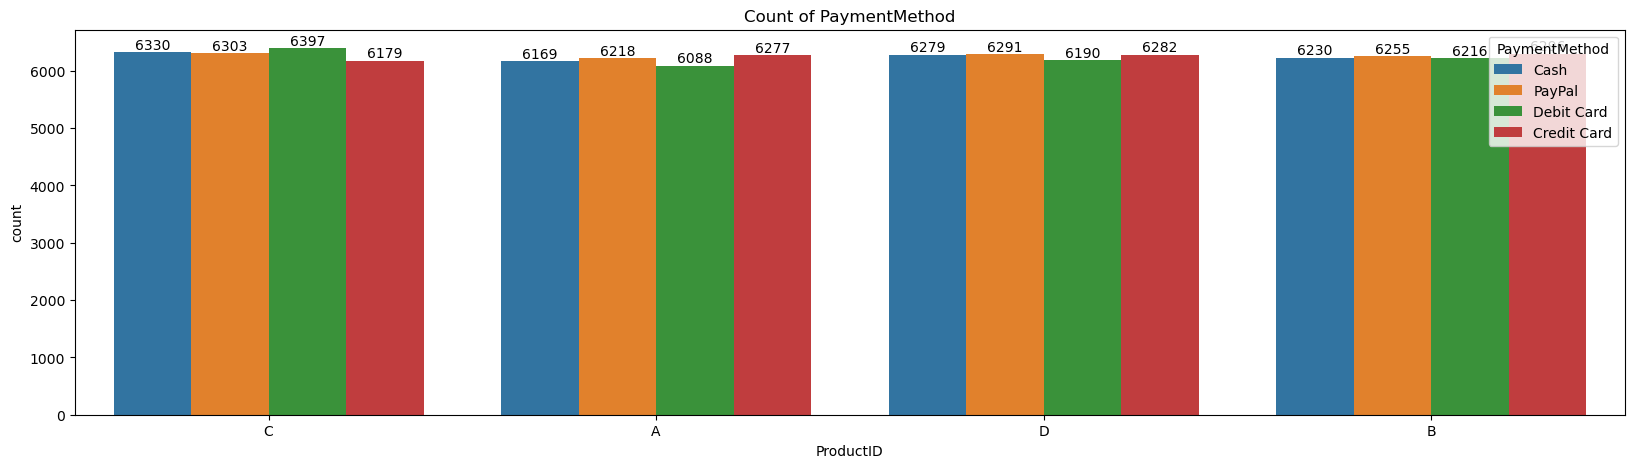

In [24]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df, x='ProductID', hue='PaymentMethod')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of PaymentMethod')    

In [25]:
df.groupby('TransactionDate')['TotalAmount'].sum()

TransactionDate
2023-04-29 22:27:00    176.102880
2023-04-29 22:29:00    416.546875
2023-04-29 22:39:00    216.950602
2023-04-29 22:45:00    426.845208
2023-04-29 22:53:00    101.662372
                          ...    
2024-04-28 22:05:00    147.716239
2024-04-28 22:07:00     55.310657
2024-04-28 22:17:00     92.617044
2024-04-28 22:20:00    309.142914
2024-04-28 22:22:00    622.016400
Name: TotalAmount, Length: 91025, dtype: float64

In [26]:
datetime_columns=["TransactionDate"]
for col in datetime_columns:
    df[col]=pd.to_datetime(df[col])

In [27]:
df['year']=df['TransactionDate'].dt.strftime('%Y')
df['month']=df['TransactionDate'].dt.strftime('%m')
df['day']=df['TransactionDate'].dt.strftime('%w')
df['time'] = df['TransactionDate'].dt.strftime('%I-%p')

df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount,year,month,day,time
0,109318,C,7,80.079844,2023-12-26 12:32:00,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764,2023,12,2,12-PM
1,993229,C,4,75.195229,2023-08-05 00:00:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546,2023,08,6,12-AM
2,579675,A,8,31.528816,2024-03-11 18:51:00,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651,2024,03,1,06-PM
3,799826,D,5,98.880218,2023-10-27 22:00:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769,2023,10,5,10-PM
4,121413,A,7,93.188512,2023-12-22 11:38:00,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484,2023,12,5,11-AM


In [28]:
monthly_sales=df.groupby(['ProductCategory','month']).count()['TransactionDate'].reset_index().rename(columns={'TransactionDate':'count'}).pivot(index='month',columns='ProductCategory',values='count').reset_index()
monthly_sales


ProductCategory,month,Books,Clothing,Electronics,Home Decor
0,01,2090,2121,2151,2181
1,02,1989,2080,1987,2020
2,03,2132,2139,2080,2106
3,04,2011,1989,1889,2032
4,05,2125,2119,2102,2042
5,06,2081,2072,2081,2009
6,07,2123,2174,2133,2167
7,08,2181,2171,2094,2052
8,09,2009,2016,2073,2083
9,10,2040,2028,2202,2055


<Axes: >

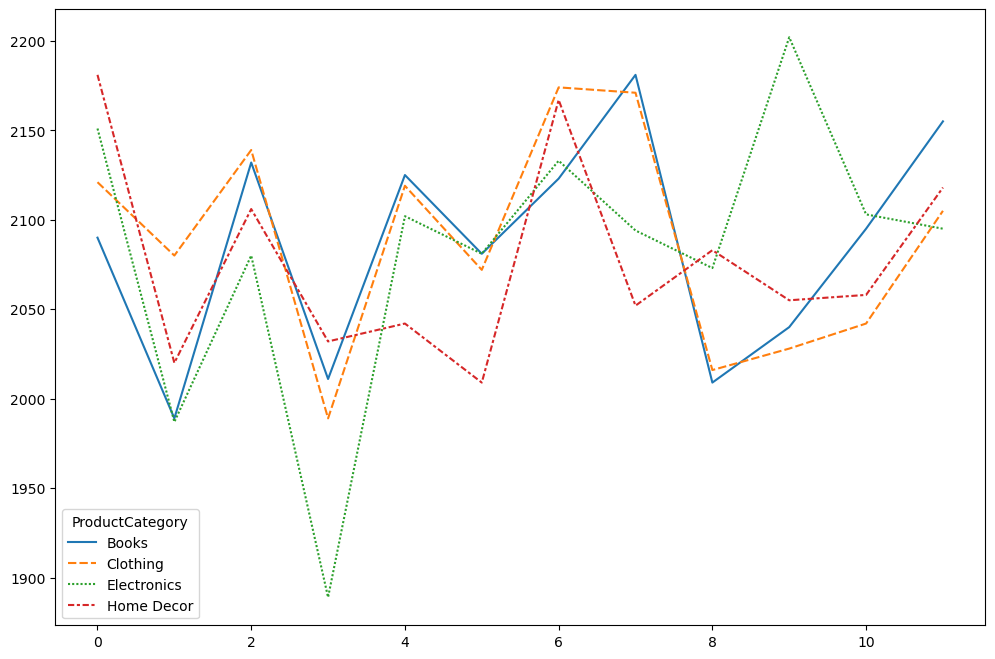

In [29]:
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly_sales)

In [30]:
weekly_sales=df.groupby(['day']).count()['TransactionDate'].reset_index().rename(columns={'TransactionDate':'count'}).pivot
weekly_sales

<bound method DataFrame.pivot of   day  count
0   0  14291
1   1  14259
2   2  14212
3   3  14288
4   4  14344
5   5  14252
6   6  14354>

In [31]:
weekly_sales1=df.groupby(['ProductCategory','day']).count()['TransactionDate'].reset_index().rename(columns={'TransactionDate':'count'}).pivot(index='day',columns='ProductCategory',values='count').reset_index()
weekly_sales1

ProductCategory,day,Books,Clothing,Electronics,Home Decor
0,0,3627,3514,3601,3549
1,1,3612,3527,3541,3579
2,2,3602,3556,3574,3480
3,3,3552,3620,3575,3541
4,4,3548,3641,3615,3540
5,5,3519,3501,3584,3648
6,6,3571,3697,3500,3586


<Axes: >

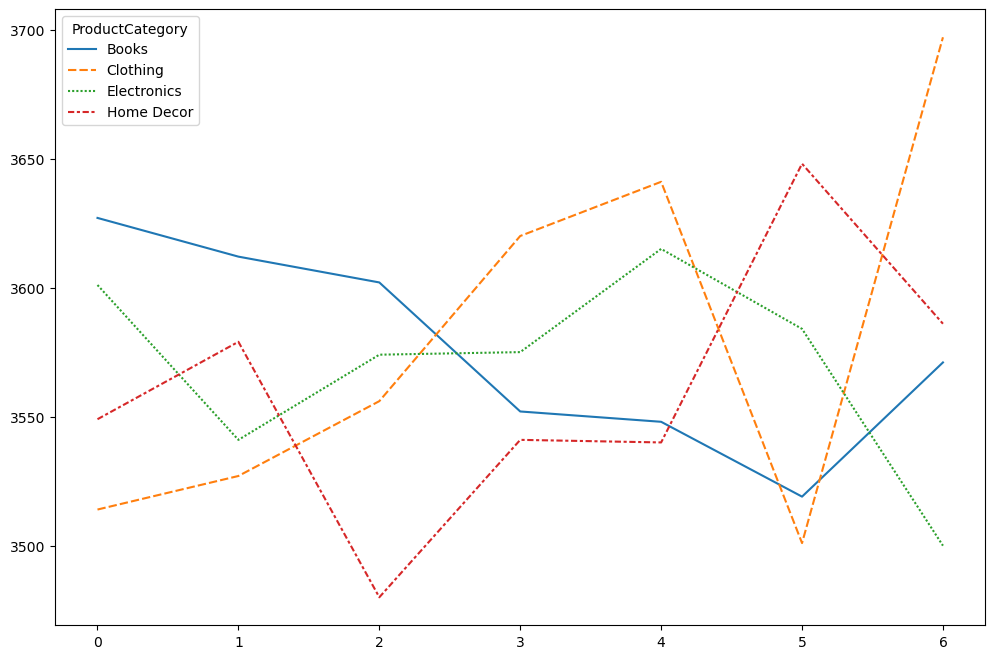

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(data=weekly_sales1)

In [33]:
hourly_sale=df.groupby('time').count()['TransactionDate'].reset_index().rename(columns={'TransactionDate':'count'})
hourly_sale

,time,count
0,01-AM,4247
1,01-PM,4130
2,02-AM,4135
3,02-PM,4142
4,03-AM,4147
5,03-PM,4052
6,04-AM,4226
7,04-PM,4210
8,05-AM,4198
9,05-PM,4186


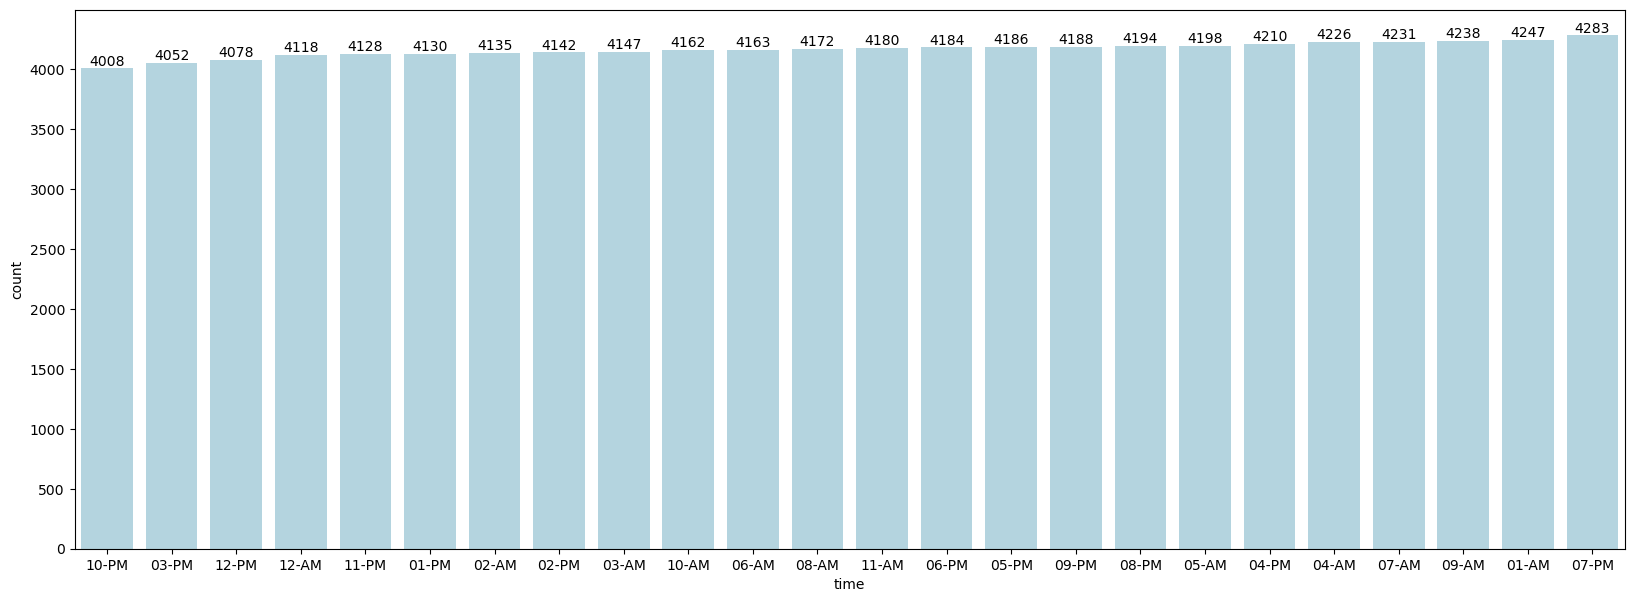

In [34]:
plt.figure(figsize=(20,7))
ax=sns.barplot(data=hourly_sale.sort_values(by='count', ascending=True),x='time',y='count',color='lightblue')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()    

In [35]:
hourly_sales_by_coffee=df.groupby(['time','ProductCategory']).count()['TransactionDate'].reset_index().rename(columns={'TransactionDate':'count'}).pivot(index='time',columns='ProductCategory',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

ProductCategory,time,Books,Clothing,Electronics,Home Decor
0,01-AM,1028,1087,1082,1050
1,01-PM,1038,1041,1002,1049
2,02-AM,1056,1032,1037,1010
3,02-PM,1035,1054,1045,1008
4,03-AM,1011,1036,1051,1049
5,03-PM,1002,1027,1015,1008
6,04-AM,1086,1011,1067,1062
7,04-PM,1095,1034,1061,1020
8,05-AM,1056,1056,1051,1035
9,05-PM,1029,1096,1016,1045
